In [1]:
import numpy as np
from numpy import sqrt, sin, cos
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.special import jv as j
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 130

In [2]:
def Helmholtz(n, k):
    #intialize constants
    h = 1 / n
    X = np.linspace(0, 1, n+1)
    xv, yv = np.meshgrid(X, X)
    
    #forcing function
    f = lambda x, y: (k**2 - 1)*(cos(x) + sin(y))
    
    #boundry condition function
    bc_func = lambda x, y: j(0, k*sqrt(x**2 + y**2)) + cos(x) + sin(y)
    
    #make A matrix
    T = sp.diags([1, (h*k)**2 - 4, 1], [-1, 0, 1], shape=(n-1, n-1))
    A = (sp.block_diag([T]*(n-1))
         + sp.diags([1, 1], [-(n-1), n-1], shape=((n-1)**2, (n-1)**2))) / h**2
    
    #boundry conditons
    bc = np.zeros((n-1, n-1))
    bc[:, 0] = bc_func(0, X[1:-1])
    bc[:, -1] = bc_func(1, X[1:-1])
    bc[0] = bc_func(X[1:-1], 0)
    bc[-1] = bc_func(X[1:-1], 1)
    bc = np.ravel(bc) / h**2
    
    #solve for f
    F = f(xv[1:-1, 1:-1], yv[1:-1, 1:-1])
    F = np.ravel(F)
    
    #solve for U
    U = bc_func(xv, yv)
    U_in = spla.spsolve(A, F - bc)
    U_in = np.reshape(U_in, (n-1, n-1))
    U[1:-1, 1:-1] = U_in
    
    return U

In [3]:
true_f = lambda x, y, k: j(0, k*sqrt(x**2 + y**2)) + cos(x) + sin(y)

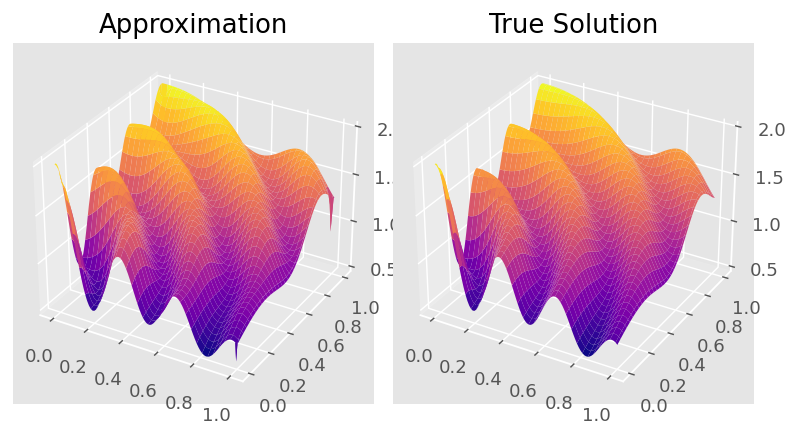

In [4]:
n, k = 100, 20

#solve
U = Helmholtz(n, k)
X = np.linspace(0, 1, n+1)
xv, yv = np.meshgrid(X, X)
sol = true_f(xv, yv, k)

#plot
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Approximation')
ax.plot_surface(xv, yv, U, cmap='plasma')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('True Solution')
ax.plot_surface(xv, yv, sol, cmap='plasma')
plt.tight_layout()
plt.show()